<a href="https://colab.research.google.com/github/qianjing2020/DS-Unit-1-Sprint-2-Statistics/blob/master/JingQian_LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [0]:
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):
  P_DD = prob_drunk_prior # this is the prob of drunk drive for the population
  P_T_ND = false_positive_rate # prob of Not drunk given test result of 1
  P_T_DD = true_positive_rate # prob of drunk given test result of 1
  P_ND = 1-P_DD # prob of not drunck drive
  
  P_T = P_DD*P_T_DD + P_ND*P_T_ND

  numerator = P_DD*P_T_DD
  denominator = P_T

  P_DD_T =numerator/denominator
  return (P_DD_T, P_T)

In [21]:
# What is the probability that a person is drunk after one positive breathalyzer test?
P1, P2 = prob_drunk_given_positive(1/1000, 8/100, 1)
print(f'The probability that a person is drunk after one positive breathalyzer test is {100*P1}%')
print(f'The probability that a person test positive (drunk or no drunk) by one breathalyzer test is {100*P2}%')
                                                                      

The probability that a person is drunk after one positive breathalyzer test is 1.2357884330202669%
The probability that a person test positive (drunk or no drunk) by one breathalyzer test is 8.092%


In [0]:
# How many positive breathalyzer tests are needed in order to have a probability
# that's greater than 95% that a person is drunk beyond the legal limit?
def prob_drunk_given_n_positive(prob_drunk_prior, false_positive_rate, true_positive_rate, n):
  # probility known
  P_DD = prob_drunk_prior # this is the prob of drunk drive for the population
  P_T_ND = false_positive_rate # prob of Not drunk given test result of 1
  P_T_DD = true_positive_rate # prob of drunk given test result of 1                                 
  P_ND = 1-P_DD # prob of not drunck drive
  
  # probility inferred for n positive tests 
  P_nT_DD = P_T_DD**n  # prob of n positive given drunk drive
  P_nT_ND = P_T_ND**n  # prob of n positive given not drunk
  P_nT = P_DD*P_nT_DD + P_ND*P_nT_ND # prob of n positive 

  numerator = P_DD*P_nT_DD
  denominator = P_nT
  P_DD_nT = numerator/denominator 
 
  return (P_DD_nT, P_nT)

In [24]:
# What is the probability that a person is drunk after two positive breathalyzer tests?
P1, P2 = prob_drunk_given_n_positive(1/1000, 8/100, 1, 2)
print(f'The probability that a person is drunk after two positive breathalyzer tests is {100*P1}%')
print(f'The probability that a person test positive (drunk or no drunk) by two breathalyzer tests is {100*P2}%')


The probability that a person is drunk after two positive breathalyzer tests is 13.525210993291495%
The probability that a person test positive (drunk or no drunk) by two breathalyzer tests is 0.73936%


A total of 4 positive tests are needed  to charge a person with drunk &drive with 95% confidence
0 0.01
1 0.14
2 0.66
3 0.96


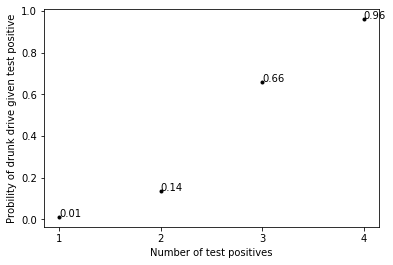

In [108]:
# How many positive breathalyzer tests are needed in order to have a probability 
# that's greater than 95% that a person is drunk beyond the legal limit?
P = 0  # initialize
P_set = []
i = 1
while P < 0.95:
  P1, P2 = prob_drunk_given_n_positive(1/1000, 8/100, 1, i)
  P = P1 
  i+=1
  P_set.append(P)
print(f'A total of {len(P_set)} positive tests are needed  to charge a person with drunk &drive with 95% confidence')

import numpy as np
import matplotlib.pyplot as plt
data = np.array([list(range(1,5)), P_set]).T

plt.plot(data[:,0], data[:,1],'k.')
plt.xlabel('Number of test positives')
plt.ylabel('Probility of drunk drive given test positive')
plt.xticks(data[:,0])
data_text = np.round(data[:,1],2)

for i, text in enumerate(data_text):
  print(i, text)
  plt.annotate(text, (data[i,0], data[i,1]) )

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!